In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
sb.set()

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



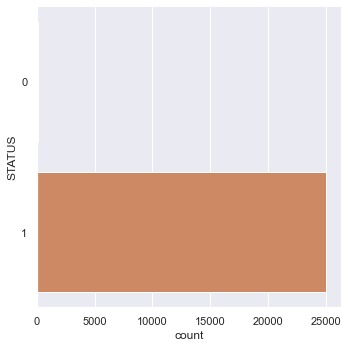

In [2]:
# Function for calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    sb.catplot(y = "STATUS", data = df, kind = "count")
    print()
 
# Function to calculating metrics of confusionMatrix
def confusionMatrix(matrix, flag):
    #TN FP
    #FN TP
    
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    if flag:
        print("Test Dataset: ")
    else:
        print("Train Dataset: ")
    
    print("True Positive Rate: {:.2f}%".format((TP * 100)/(TP + FN)))
    print("False Positive Rate: {:.2f}%\n".format((FP * 100)/(FP + TN)))
    
    print("True Negative Rate: {:.2f}%".format((TN * 100)/(TN + FP)))
    print("False Negative Rate: {:.2f}%\n".format((FN * 100)/(FN + TP)))
    print()

ratio(df)

In [3]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [4]:
# Considering numeric vars only
# Over-sampling (using SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS' and col != 'GOOD_PERCENT' and col != 'FLAG_EMAIL':
        X = pd.DataFrame(new_df[col])
        
        # Resampling the minority class. The strategy can be changed as required.
        sm = SMOTE(sampling_strategy='minority', random_state=42)

        # Fit and resample imbalanced data
        X_res, y_res = sm.fit_resample(X, y) # kmeans_smote.fit_resample(X, y)
        print(col)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 8)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        confusionMatrix(confusion_matrix(y_train, y_train_pred), 0)
        if len(top) < 3:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES:')
for key, val in top.items():
    print(f'{val}      \t: {key}')

FLAG_OWN_CAR
Train Data for FLAG_OWN_CAR
Accuracy  :	0.5021824763121473

Train Dataset: 
True Positive Rate: 58.10%
False Positive Rate: 57.69%

True Negative Rate: 42.31%
False Negative Rate: 41.90%


FLAG_OWN_REALTY
Train Data for FLAG_OWN_REALTY
Accuracy  :	0.5134674757798361

Train Dataset: 
True Positive Rate: 65.50%
False Positive Rate: 62.83%

True Negative Rate: 37.17%
False Negative Rate: 34.50%


CNT_CHILDREN
Train Data for CNT_CHILDREN
Accuracy  :	0.5414670499307995

Train Dataset: 
True Positive Rate: 12.57%
False Positive Rate: 4.51%

True Negative Rate: 95.49%
False Negative Rate: 87.43%


AMT_INCOME_TOTAL
Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.7006281273288619

Train Dataset: 
True Positive Rate: 70.29%
False Positive Rate: 30.17%

True Negative Rate: 69.83%
False Negative Rate: 29.71%


FLAG_MOBIL
Train Data for FLAG_MOBIL
Accuracy  :	0.5019429362291068

Train Dataset: 
True Positive Rate: 0.00%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negati

# Prediction Using Balanced Dataset

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       AMT_INCOME_TOTAL  APPLICANT_AGE  YEARS_WORKING
count      2.513400e+04   25134.000000   25134.000000
mean       1.948339e+05      40.536166       7.204106
std        1.045110e+05       9.559474       6.414231
min        2.700000e+04      21.000000       0.000000
25%        1.350000e+05      33.000000       3.000000
50%        1.800000e+05      40.000000       5.000000
75%        2.250000e+05      48.000000      10.000000
max        1.575000e+06      67.000000      43.000000

After Over-sampling: 
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8408655381667199
Train Dataset: 
True Positive Rate: 50.31%
False Positive Rate: 51.12%

True Negative Rate: 48.88%
False Negative Rate: 49.69%



Goodness of Fit of Model 	Test Dataset
Classific

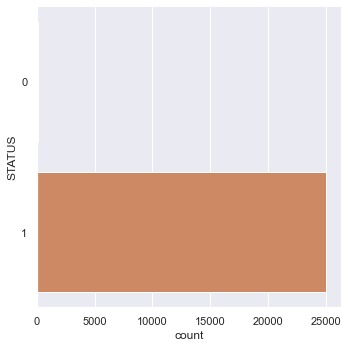

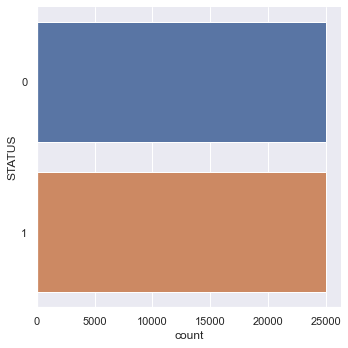

In [5]:
'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = sm.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.25)

dectree = DecisionTreeClassifier(max_depth = 8) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
confusionMatrix(confusion_matrix(y_train, y_train_pred1), 0)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
confusionMatrix(confusion_matrix(y_test, y_test_pred1), 1)
print()


<AxesSubplot:>

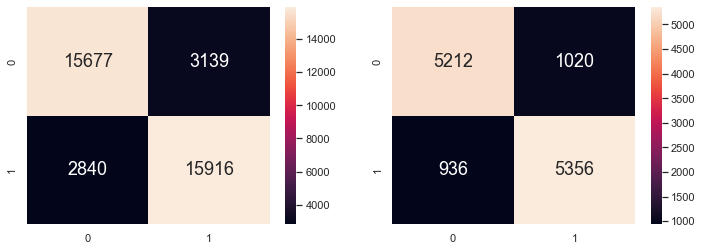

In [6]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [7]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(64,12), dpi = 600)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])

[Text(0.3999208860759494, 0.9444444444444444, 'YEARS_WORKING <= 5.0\ngini = 0.5\nsamples = 37572\nvalue = [18816, 18756]\nclass = Bad'),
 Text(0.2231012658227848, 0.8333333333333334, 'YEARS_WORKING <= 4.0\ngini = 0.475\nsamples = 20606\nvalue = [12585, 8021]\nclass = Bad'),
 Text(0.21044303797468356, 0.7222222222222222, 'YEARS_WORKING <= 4.0\ngini = 0.487\nsamples = 19163\nvalue = [11142, 8021]\nclass = Bad'),
 Text(0.12341772151898735, 0.6111111111111112, 'YEARS_WORKING <= 3.001\ngini = 0.464\nsamples = 16866\nvalue = [10694, 6172]\nclass = Bad'),
 Text(0.11075949367088607, 0.5, 'YEARS_WORKING <= 3.0\ngini = 0.483\nsamples = 15089\nvalue = [8917, 6172]\nclass = Bad'),
 Text(0.06329113924050633, 0.3888888888888889, 'YEARS_WORKING <= 2.0\ngini = 0.444\nsamples = 12952\nvalue = [8645, 4307]\nclass = Bad'),
 Text(0.05063291139240506, 0.2777777777777778, 'AMT_INCOME_TOTAL <= 427675.562\ngini = 0.484\nsamples = 10483\nvalue = [6176, 4307]\nclass = Bad'),
 Text(0.02531645569620253, 0.1666666

# RandomForest Classification

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 8, random_state=0) 

# Fit Random Forest on Train Data
randomForest.fit(X_train1, y_train1) 

C:\Users\65943\AppData\Local\Temp/ipykernel_12348/2609625007.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=8, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.906605983178963

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9065793676141808



<AxesSubplot:>

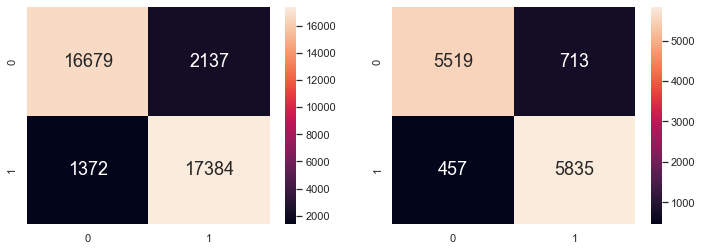

In [9]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = randomForest.predict(X_train1)
y_test_pred = randomForest.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomForest.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomForest.score(X_test1, y_test1))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [10]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred), 1)

Train Dataset: 
True Positive Rate: 92.69%
False Positive Rate: 11.36%

True Negative Rate: 88.64%
False Negative Rate: 7.31%



Test Dataset: 
True Positive Rate: 92.74%
False Positive Rate: 11.44%

True Negative Rate: 88.56%
False Negative Rate: 7.26%




In [11]:
predictedProbability = randomForest.predict_proba(X_test1)
predictedProbability

array([[0.78678482, 0.21321518],
       [0.11922499, 0.88077501],
       [0.4630684 , 0.5369316 ],
       ...,
       [0.46104606, 0.53895394],
       [0.56527113, 0.43472887],
       [0.76655411, 0.23344589]])

In [12]:
step = 0.01 
thresholdValue = 0.2 
rocScore = 0

while thresholdValue <=0.8: #continue to check best threshold upto probability 0.8
    tempValue = thresholdValue
    predicted = (predictedProbability[:,1] >= tempValue).astype('int') #change the class boundary for prediction
    print('Threshold', f"{round(tempValue, 2):<04}", '----', roc_auc_score(y_test1, predicted))
    if rocScore < roc_auc_score(y_test1, predicted): #store the threshold for best classification
        rocScore = roc_auc_score(y_test1, predicted)
        thrsh_score = float(thresholdValue)
    thresholdValue += step
print('--- Optimum Threshold ---',f"{round(thrsh_score, 2):<04}",'--ROC--',rocScore)

Threshold 0.20 ---- 0.609367948541131
Threshold 0.21 ---- 0.6197979870520424
Threshold 0.22 ---- 0.6427448368529591
Threshold 0.23 ---- 0.6567065723983101
Threshold 0.24 ---- 0.6767666339961824
Threshold 0.25 ---- 0.6921732937968788
Threshold 0.26 ---- 0.700437858617051
Threshold 0.27 ---- 0.704690870163796
Threshold 0.28 ---- 0.722908677563538
Threshold 0.29 ---- 0.7308546133525711
Threshold 0.30 ---- 0.7508352089618865
Threshold 0.31 ---- 0.7792423616761345
Threshold 0.32 ---- 0.7893621870019348
Threshold 0.33 ---- 0.7989975656272774
Threshold 0.34 ---- 0.8085496528795048
Threshold 0.35 ---- 0.8215585616390845
Threshold 0.36 ---- 0.833516050701545
Threshold 0.37 ---- 0.842104600091238
Threshold 0.38 ---- 0.8470896372270511
Threshold 0.39 ---- 0.8509468489848347
Threshold 0.40 ---- 0.8547261249078847
Threshold 0.41 ---- 0.8617933443613219
Threshold 0.42 ---- 0.8790812772826426
Threshold 0.43 ---- 0.8799814157717647
Threshold 0.44 ---- 0.8839395156716314
Threshold 0.45 ---- 0.885237749